In [1]:
import numpy
import pandas
import matplotlib
import seaborn

In [2]:
sales=pandas.read_csv("/home/hussein-ali/Documents/eCODE/Supermarket Sales/data/sales-data.csv")
sales.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [4]:
sales.shape

(1006, 16)

In [5]:
sales["Total"][sales["Total"].isna()]

0    NaN
14   NaN
37   NaN
Name: Total, dtype: float64

In [6]:
sales["Tax 5%"][sales["Tax 5%"].isna()]

3     NaN
8     NaN
86    NaN
92    NaN
97    NaN
629   NaN
830   NaN
881   NaN
903   NaN
Name: Tax 5%, dtype: float64

In [7]:
sales["Unit price"]  = pandas.to_numeric(sales["Unit price"],errors="coerce")

In [8]:
sales.loc[0,"Total"] = sales.loc[0]["Quantity"]  * sales.loc[0]["Unit price"]+sales.loc[0]["Tax 5%"]
sales.loc[14,"Total"]= sales.loc[14]["Quantity"] * sales.loc[14]["Unit price"]+sales.loc[14]["Tax 5%"]
sales.loc[37,"Total"]= sales.loc[37]["Quantity"] * sales.loc[37]["Unit price"]+sales.loc[37]["Tax 5%"]

In [9]:
sales.loc[3,"Tax 5%"]   = (sales.loc[3]["Total"])  - (sales.loc[3]["Quantity"]  * sales.loc[3]["Unit price"]  )
sales.loc[8,"Tax 5%"]   = (sales.loc[8]["Total"])  - (sales.loc[8]["Quantity"]  * sales.loc[8]["Unit price"]  )
sales.loc[86,"Tax 5%"]  = (sales.loc[86]["Total"]) - (sales.loc[86]["Quantity"] * sales.loc[86]["Unit price"] )
sales.loc[92,"Tax 5%"]  = (sales.loc[92]["Total"]) - (sales.loc[92]["Quantity"] * sales.loc[92]["Unit price"] )

In [10]:
sales.drop(index=[97,629,830,881,903],inplace=True)

In [11]:
print(sales["Total"][sales["Total"].isna()].sum())
print(sales["Tax 5%"][sales["Tax 5%"].isna()].sum())

0.0
0.0


In [12]:
sales.isna().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [13]:
sales.isnull().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [14]:
sales.duplicated().sum()

np.int64(6)

In [15]:
sales = sales.drop_duplicates(keep="last")

In [16]:
sales.duplicated().sum()

np.int64(0)

In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     995 non-null    object 
 1   Branch         995 non-null    object 
 2   Yangon         995 non-null    int64  
 3   Naypyitaw      995 non-null    int64  
 4   Mandalay       995 non-null    int64  
 5   Customer type  995 non-null    object 
 6   Gender         995 non-null    object 
 7   Product line   995 non-null    object 
 8   Unit price     995 non-null    float64
 9   Quantity       995 non-null    int64  
 10  Tax 5%         995 non-null    float64
 11  Total          995 non-null    float64
 12  Date           995 non-null    object 
 13  Time           995 non-null    object 
 14  Payment        995 non-null    object 
 15  Rating         995 non-null    float64
dtypes: float64(4), int64(4), object(8)
memory usage: 132.1+ KB


In [18]:
sales["Branch"].value_counts()

Branch
A    337
B    332
C    326
Name: count, dtype: int64

In [19]:
sales["Customer type"].value_counts()

Customer type
Normal     509
Member     458
-           27
Memberr      1
Name: count, dtype: int64

In [20]:
sales.loc[sales["Customer type"]=="Memberr"] = "Member"

/tmp/ipykernel_1922/2418137218.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Member' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales["Customer type"]=="Memberr"] = "Member"
/tmp/ipykernel_1922/2418137218.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Member' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales["Customer type"]=="Memberr"] = "Member"
/tmp/ipykernel_1922/2418137218.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Member' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales["Customer type"]=="Memberr"] = "Member"
/tmp/ipykernel_1922/2418137218.py:1: Future

In [21]:
sales.loc[sales["Customer type"]=="-"] = "Member" 

In [22]:
sales["Gender"].value_counts()

Gender
Male      505
Female    462
Member     28
Name: count, dtype: int64

In [23]:
sales.drop(index=sales.loc[sales["Gender"]=="Member"].index,inplace=True)

In [24]:
sales["Product line"].value_counts()

Product line
Fashion accessories       171
Food and beverages        168
Electronic accessories    164
Sports and travel         162
Home and lifestyle        156
Health and beauty         146
Name: count, dtype: int64

In [25]:
sales["Date"]=pandas.to_datetime(sales["Date"],format="mixed").dt.date

In [26]:
print(sales["Date"].min(),sales["Date"].max())

2019-01-01 2019-03-30


In [27]:
sales.loc[sales["Time"]=="8 - 30 PM"] = "08:30"

In [28]:
sales["Time"]

0       13:08
1       10:29
2       13:23
3       08:30
4       10:37
        ...  
1001    14:30
1002    11:32
1003    10:41
1004    12:44
1005    20:07
Name: Time, Length: 967, dtype: object

In [29]:
sales.drop(index=sales.loc[sales["Payment"]=="08:30"].index,inplace=True)

In [30]:
sales["Payment"].value_counts()

Payment
Ewallet        334
Cash           329
Credit card    303
Name: count, dtype: int64

In [31]:
sales.loc[sales["Rating"]==97.0,"Rating"]=sales["Rating"].mean()

In [32]:
sales["Rating"].value_counts()

Rating
6.000000     26
6.600000     23
4.200000     22
5.000000     21
8.000000     21
             ..
8.100000     11
4.000000     10
4.600000      8
10.000000     3
7.052899      1
Name: count, Length: 62, dtype: int64

In [33]:
print(sales["Rating"].min(),sales["Rating"].max())

4.0 10.0


In [34]:
sales.columns

Index(['Invoice ID', 'Branch', 'Yangon', 'Naypyitaw', 'Mandalay',
       'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity',
       'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'Rating'],
      dtype='object')

In [35]:
sales

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3
5,699-14-3026,C,0,1,0,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.985,860.685,2019-03-03,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.649,34.629,2019-02-05,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-02-05,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.494,535.374,2019-02-15,12:44,Cash,8.4


In [36]:
total_Q3 = sales["Total"].quantile(0.75)
total_Q1 = sales["Total"].quantile(0.25)
total_IQR= total_Q3-total_Q1
total_U  = total_Q3 + (1.5*total_IQR) 
total_L  = total_Q1 - (1.5*total_IQR)
total_Min = sales["Total"].min()
total_Max = sales["Total"].max()
print("Q1:{a} - Q3:{b} - IQR:{c} - U:{d} - L:{e} - Min:{f} - Max:{g}".format(a=total_Q1,b=total_Q3,c=total_IQR,d=total_U,e=total_L,f=total_Min,g=total_Max))

Q1:126.29925 - Q3:470.44725 - IQR:344.148 - U:986.6692499999999 - L:-389.92274999999995 - Min:10.6785 - Max:1042.65


In [37]:
tax_Q3 = sales["Tax 5%"].quantile(0.75)
tax_Q1 = sales["Tax 5%"].quantile(0.25)
tax_IQR= tax_Q3-tax_Q1
tax_U  = tax_Q3 + (1.5*tax_IQR) 
tax_L  = tax_Q1 - (1.5*tax_IQR)
tax_Min = sales["Tax 5%"].min()
tax_Max = sales["Tax 5%"].max()
print("Q1:{a} - Q3:{b} - IQR:{c} - U:{d} - L:{e} - Min:{f} - Max:{g}".format(a=tax_Q1,b=tax_Q3,c=tax_IQR,d=tax_U,e=tax_L,f=tax_Min,g=tax_Max))

Q1:6.01425 - Q3:22.402250000000002 - IQR:16.388 - U:46.98425 - L:-18.56775 - Min:0.5085 - Max:49.65


In [38]:
sales.drop(index=sales[((sales["Total"]>total_U)|(sales["Total"]<total_L))&((sales["Tax 5%"]>tax_U)|(sales["Tax 5%"]<tax_L))].index,inplace=True)

In [39]:
sales

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3
5,699-14-3026,C,0,1,0,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.985,860.685,2019-03-03,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.649,34.629,2019-02-05,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-02-05,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.494,535.374,2019-02-15,12:44,Cash,8.4


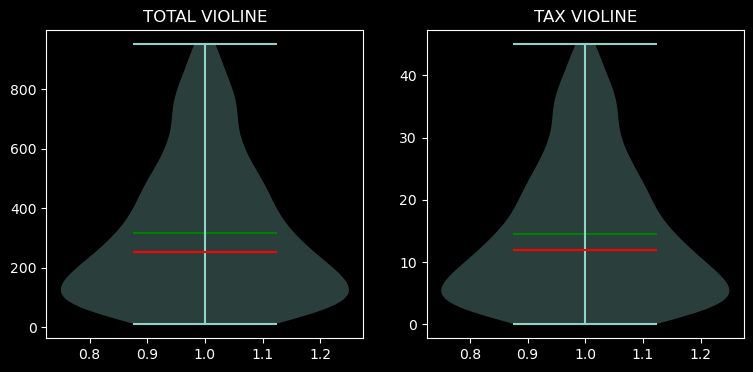

In [40]:
matplotlib.pyplot.style.use('dark_background')
figure , axis = matplotlib.pyplot.subplots(1,2,figsize=(9,4))
total_violinplot = axis[0].violinplot(numpy.array(sales["Total"].astype("int")),showmeans=True,showextrema=True,showmedians=True)
tax_violinplot = axis[1].violinplot(numpy.array(sales["Tax 5%"].astype("int")),showmeans=True,showextrema=True,showmedians=True)
axis[0].set_title("TOTAL VIOLINE")
axis[1].set_title("TAX VIOLINE")
total_violinplot['cmedians'].set_color("red")
total_violinplot['cmeans'].set_color("green")
total_violinplot['cmedians'].set_color("red")
tax_violinplot['cmedians'].set_color("red")
tax_violinplot['cmeans'].set_color("green")
tax_violinplot['cmedians'].set_color("red")
matplotlib.pyplot.show()

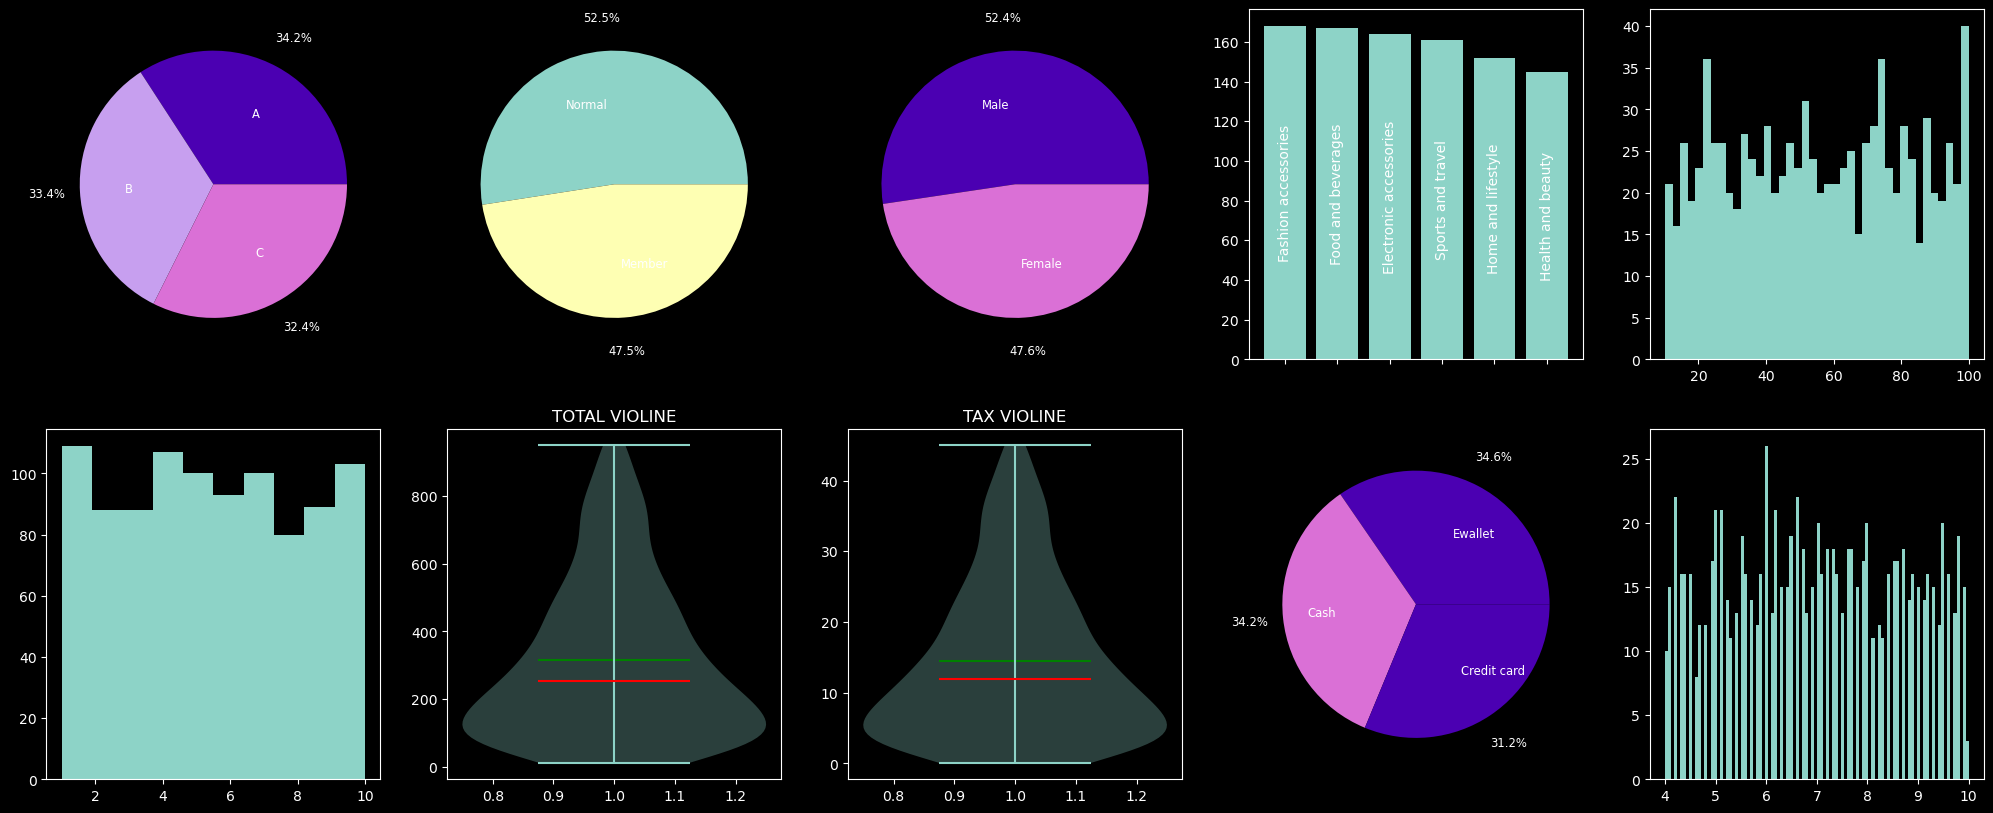

In [41]:
matplotlib.pyplot.style.use('dark_background')
figure , axis = matplotlib.pyplot.subplots(2,5,figsize=(25,10))

branch_pieplot = axis[0,0].pie(
    sales["Branch"].value_counts().values,
    labels=sales["Branch"].value_counts().index,
    colors=["#4B00B2","#C79FEF","#DA70D6"],
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=.6,
    textprops={'size': 'smaller','color':'white'},
    rotatelabels=False,
    frame=False)

customer_pieplot = axis[0,1].pie(
    sales["Customer type"].value_counts().values,
    labels=sales["Customer type"].value_counts().index,
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=.6,
    textprops={'size': 'smaller','color':'white'},
    rotatelabels=False,
    frame=False)

gender_pieplot = axis[0,2].pie(
    sales["Gender"].value_counts().values,
    labels=sales["Gender"].value_counts().index,
    colors=["#4B00B2","#DA70D6"],
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=.6,
    textprops={'size': 'smaller','color':'white'},
    rotatelabels=False,
    frame=False)

line_barplot = axis[0,3].bar(
    height=sales["Product line"].value_counts().values,
    x=sales["Product line"].value_counts().index,
    tick_label=sales["Product line"].value_counts().index,
    )
axis[0,3].set_xticklabels([])
for i,value in enumerate(sales["Product line"].value_counts().values):
    axis[0,3].text(i,value/2,sales["Product line"].value_counts().index[i],ha='center',va='center',rotation=90)

unit_histplot = axis[0,4].hist(x=sales["Unit price"],bins=40)
quantity_histplot = axis[1,0].hist(x=sales["Quantity"],bins=10)

total_violinplot = axis[1,1].violinplot(numpy.array(sales["Total"].astype("int")),showmeans=True,showextrema=True,showmedians=True)
tax_violinplot = axis[1,2].violinplot(numpy.array(sales["Tax 5%"].astype("int")),showmeans=True,showextrema=True,showmedians=True)


Payment_pieplot = axis[1,3].pie(
    sales["Payment"].value_counts().values,
    labels=sales["Payment"].value_counts().index,
    colors=["#4B00B2","#DA70D6"],
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=.6,
    textprops={'size': 'smaller','color':'white'},
    rotatelabels=False,
    frame=False)

Rating_histplot = axis[1,4].hist(x=sales["Rating"],bins=100)

axis[1,1].set_title("TOTAL VIOLINE")
axis[1,2].set_title("TAX VIOLINE")
total_violinplot['cmedians'].set_color("red")
total_violinplot['cmeans'].set_color("green")
total_violinplot['cmedians'].set_color("red")
tax_violinplot['cmedians'].set_color("red")
tax_violinplot['cmeans'].set_color("green")
tax_violinplot['cmedians'].set_color("red")
matplotlib.pyplot.show()

In [113]:
Branch2CustomerType=pandas.pivot_table(data=sales,index="Branch",columns="Customer type",aggfunc="size",fill_value=0).reset_index()
Branch2CustomerType

Customer type,Branch,Member,Normal
0,A,153,174
1,B,147,173
2,C,155,155


In [111]:
Branch2CustomerGender=pandas.pivot_table(data=sales,index="Branch",columns="Gender",aggfunc="size",fill_value=0).reset_index()
Branch2CustomerGender

Gender,Branch,Female,Male
0,A,148,179
1,B,146,174
2,C,162,148


In [114]:
Branch2ProductLine=pandas.pivot_table(data=sales,index="Branch",columns="Product line",aggfunc="size",fill_value=0).reset_index()
Branch2ProductLine

Product line,Branch,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,A,59,49,56,43,63,57
1,B,53,60,48,51,47,61
2,C,52,59,63,51,42,43


In [115]:
Branch2PaymentMethod=pandas.pivot_table(data=sales,index="Branch",columns="Payment",aggfunc="size",fill_value=0).reset_index()
Branch2PaymentMethod

Payment,Branch,Cash,Credit card,Ewallet
0,A,102,101,124
1,B,108,106,106
2,C,117,92,101


In [96]:
Branch2AverageTotalSales= pandas.DataFrame(sales.groupby(sales["Branch"])["Total"].mean().reset_index())
Branch2AverageTotalSales.rename(columns={'Branch':'Branch', 'Total':'Average Total Sales'},inplace=True)
Branch2AverageTotalSales

,Branch,Average Total Sales
0,A,310.29783
1,B,317.262586
2,C,321.663503


In [102]:
Branch2AverageQuantities=pandas.DataFrame(sales.groupby(sales["Branch"])["Quantity"].mean().reset_index())
Branch2AverageQuantities.rename(columns={'Branch':'Branch', 'Quantity':'Average Products Quantities'},inplace=True)
Branch2AverageQuantities

,Branch,Average Products Quantities
0,A,5.409786
1,B,5.446875
2,C,5.464516


In [103]:
Branch2AverageRating=pandas.DataFrame(sales.groupby(sales["Branch"])["Rating"].mean().reset_index())
Branch2AverageRating.rename(columns={'Branch':'Branch', 'Rating':'Average Customers Rating'},inplace=True)
Branch2AverageRating

,Branch,Average Customers Rating
0,A,7.023853
1,B,6.81954
2,C,7.059032


In [104]:
Branch2AverageTax=pandas.DataFrame(sales.groupby(sales["Branch"])["Tax 5%"].mean().reset_index())
Branch2AverageTax.rename(columns={'Branch':'Branch', 'Tax':'Average Payed Tax'},inplace=True)
Branch2AverageTax

,Branch,Tax 5%
0,A,14.776087
1,B,15.107742
2,C,15.31731


In [154]:
Branch2CustomerType

Customer type,Branch,Member,Normal
0,A,153,174
1,B,147,173
2,C,155,155


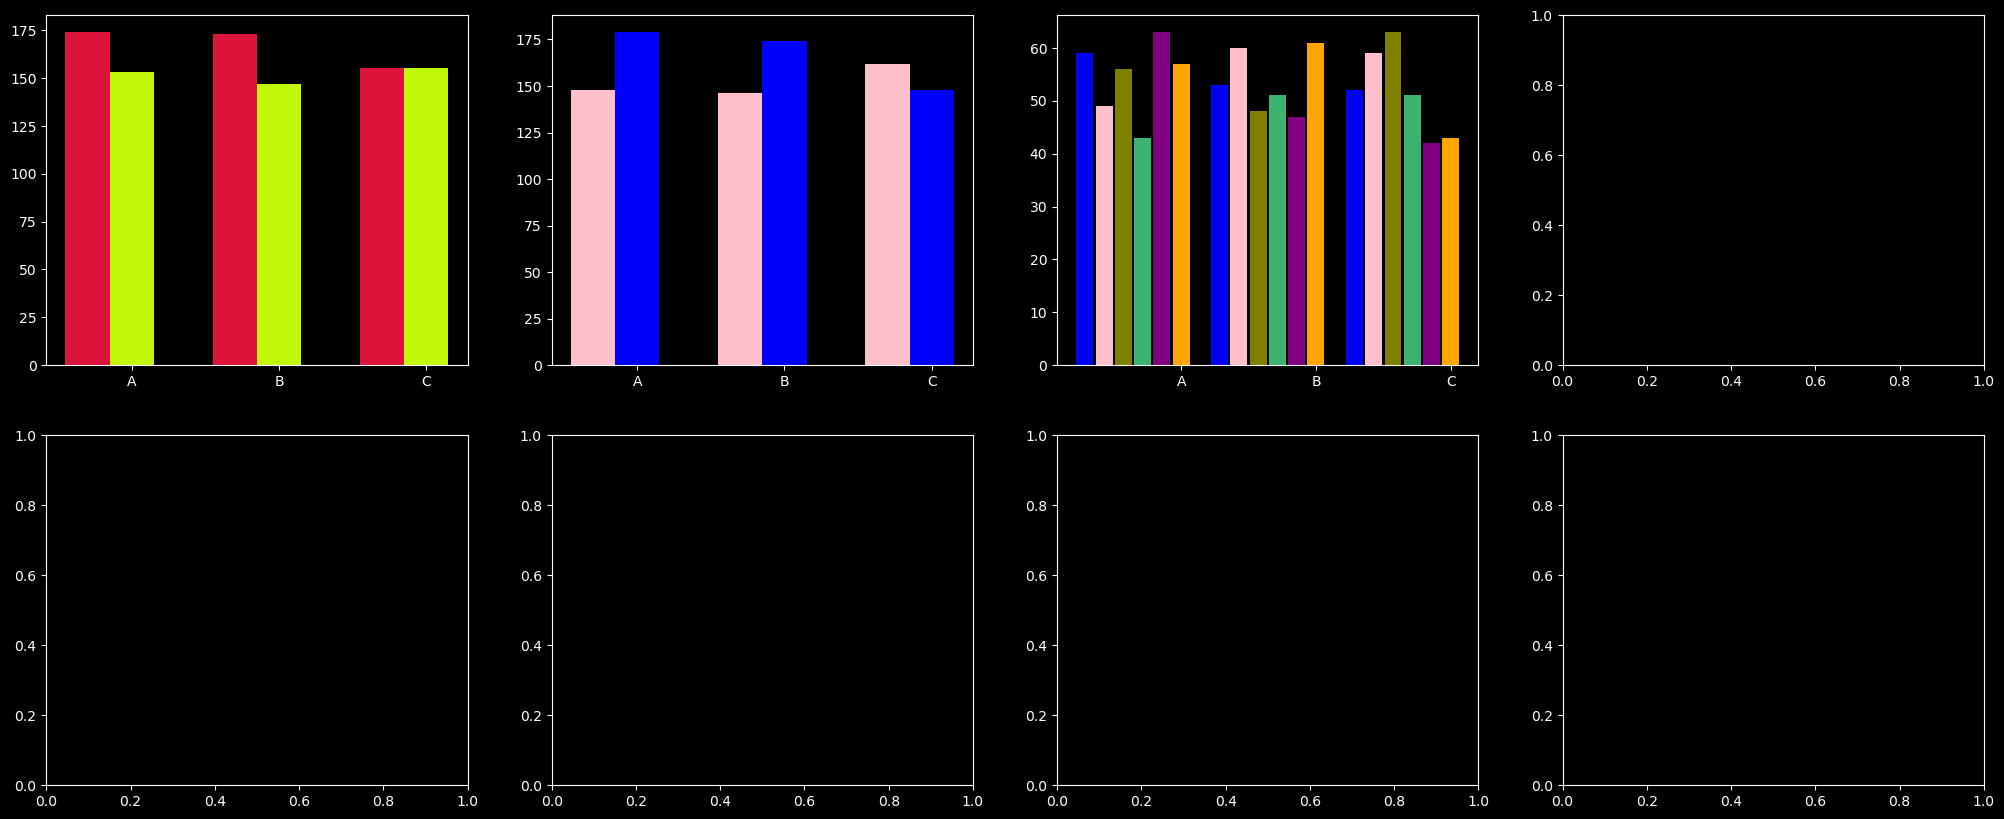

In [213]:
matplotlib.pyplot.style.use('dark_background')
figure , axis = matplotlib.pyplot.subplots(2,4,figsize=(25,10))
axis[0,0].bar([i-0.3/2 for i in range(len(Branch2CustomerType['Branch']))],Branch2CustomerType['Normal'],0.3,tick_label=Branch2CustomerType["Branch"],color='#DC143C')
axis[0,0].bar([i+0.3/2 for i in range(len(Branch2CustomerType['Branch']))],Branch2CustomerType['Member'],0.3,tick_label=Branch2CustomerType["Branch"],color='#C1F80A')

axis[0,1].bar([i-0.3/2 for i in range(len(Branch2CustomerGender['Branch']))],Branch2CustomerGender['Female'],0.3,tick_label=Branch2CustomerGender["Branch"],color='pink')
axis[0,1].bar([i+0.3/2 for i in range(len(Branch2CustomerGender['Branch']))],Branch2CustomerGender['Male'],0.3,tick_label=Branch2CustomerGender["Branch"],color='blue')

axis[0,2].bar([i-3/7 for i in range(len(Branch2ProductLine['Branch']))],Branch2ProductLine['Electronic accessories'],0.126,tick_label=Branch2ProductLine["Branch"],color='blue')
axis[0,2].bar([i-2/7 for i in range(len(Branch2ProductLine['Branch']))],Branch2ProductLine['Fashion accessories'],0.126,tick_label=Branch2ProductLine["Branch"],color='pink')
axis[0,2].bar([i-1/7 for i in range(len(Branch2ProductLine['Branch']))],Branch2ProductLine['Food and beverages'],0.126,tick_label=Branch2ProductLine["Branch"],color='olive')
axis[0,2].bar([i+0/7  for i in range(len(Branch2ProductLine['Branch']))],Branch2ProductLine['Health and beauty'],0.126,tick_label=Branch2ProductLine["Branch"],color='mediumseagreen')
axis[0,2].bar([i+1/7 for i in range(len(Branch2ProductLine['Branch']))],Branch2ProductLine['Home and lifestyle'],0.126,tick_label=Branch2ProductLine["Branch"],color='purple')
axis[0,2].bar([i+2/7 for i in range(len(Branch2ProductLine['Branch']))],Branch2ProductLine['Sports and travel'],0.126,tick_label=Branch2ProductLine["Branch"],color='orange')


#							
matplotlib.pyplot.show()

In [50]:
pandas.pivot_table(data=sales,index="Customer type",columns="Gender",aggfunc="size",fill_value=0)

Gender,Female,Male
Customer type,,
Member,232,223
Normal,224,278


In [51]:
pandas.pivot_table(data=sales,index="Customer type",columns="Product line",aggfunc="size",fill_value=0)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,72,78,86,64,77,78
Normal,92,90,81,81,75,83


In [52]:
pandas.pivot_table(data=sales,index="Customer type",columns="Payment",aggfunc="size",fill_value=0)

Payment,Cash,Credit card,Ewallet
Customer type,,,
Member,151,160,144
Normal,176,139,187


In [53]:
sales.groupby(sales["Customer type"])["Quantity"].mean().reset_index()

,Customer type,Quantity
0,Member,5.538462
1,Normal,5.350598


In [54]:
sales.groupby(sales["Customer type"])["Total"].mean().reset_index()

,Customer type,Total
0,Member,324.188446
1,Normal,309.166058


In [55]:
sales.groupby(sales["Customer type"])["Rating"].mean().reset_index()

,Customer type,Rating
0,Member,6.943516
1,Normal,6.988153


In [56]:
pandas.pivot_table(data=sales,index="Gender",columns="Product line",aggfunc="size",fill_value=0)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,76,87,82,57,72,82
Male,88,81,85,88,80,79


In [57]:
pandas.pivot_table(data=sales,index="Gender",columns="Payment",aggfunc="size",fill_value=0)

Payment,Cash,Credit card,Ewallet
Gender,,,
Female,164,152,140
Male,163,147,191


In [58]:
sales.groupby(sales["Gender"])["Quantity"].mean().reset_index()

,Gender,Quantity
0,Female,5.692982
1,Male,5.209581


In [59]:
sales.groupby(sales["Gender"])["Total"].mean().reset_index()

,Gender,Total
0,Female,325.658513
1,Male,307.798048


In [60]:
sales.groupby(sales["Gender"])["Rating"].mean().reset_index()

,Gender,Rating
0,Female,6.982237
1,Male,6.953


In [61]:
sales.groupby(sales["Product line"])["Unit price"].mean().reset_index()

,Product line,Unit price
0,Electronic accessories,54.463537
1,Fashion accessories,57.023393
2,Food and beverages,55.937066
3,Health and beauty,55.103172
4,Home and lifestyle,54.436184
5,Sports and travel,57.087267


In [62]:
sales.groupby(sales["Product line"])["Quantity"].mean().reset_index()

,Product line,Quantity
0,Electronic accessories,5.682927
1,Fashion accessories,4.952381
2,Food and beverages,5.39521
3,Health and beauty,5.6
4,Home and lifestyle,5.598684
5,Sports and travel,5.453416


In [63]:
sales.groupby(sales["Product line"])["Total"].mean().reset_index()

,Product line,Total
0,Electronic accessories,323.577155
1,Fashion accessories,290.94625
2,Food and beverages,316.396877
3,Health and beauty,323.048648
4,Home and lifestyle,319.420224
5,Sports and travel,326.268783


In [64]:
sales.groupby(sales["Product line"])["Rating"].mean().reset_index()

,Product line,Rating
0,Electronic accessories,6.92439
1,Fashion accessories,6.983333
2,Food and beverages,7.122156
3,Health and beauty,7.011724
4,Home and lifestyle,6.872059
5,Sports and travel,6.881366


In [65]:
pandas.pivot_table(data=sales,index="Product line",columns="Payment",aggfunc="size",fill_value=0)

Payment,Cash,Credit card,Ewallet
Product line,,,
Electronic accessories,66,45,53
Fashion accessories,56,50,62
Food and beverages,54,60,53
Health and beauty,46,49,50
Home and lifestyle,48,44,60
Sports and travel,57,51,53


In [66]:
sales.groupby(sales["Payment"])["Total"].mean().reset_index()

,Payment,Total
0,Cash,321.781298
1,Credit card,316.686216
2,Ewallet,310.560245


In [67]:
sales.groupby(sales["Payment"])["Rating"].mean().reset_index()

,Payment,Rating
0,Cash,6.993578
1,Credit card,6.958528
2,Ewallet,6.948196


In [68]:
sales.to_csv("/home/hussein-ali/Documents/eCODE/Supermarket Sales/data/CLEANSALES.CSV")